<a href="https://colab.research.google.com/github/Muadali/MLA_AAD/blob/main/MLA2_AAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 2

Abdifatah Dahiye

CS430-ON

Machine Learning in the Cloud

**Standard Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Imports for specific models**

In this section, you will import the models from SKLearn that you will use this in this notebook.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
     

**Imports for Splitting Data and Building Pipeline**


In [22]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
     

**Imports for Performance Measures**

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

****Confusion Matrix Function****

This function is for creating a graphical version of the confusion matrix.

In [8]:

def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

**ROC_Curve Function**

This function is for plotting the roc_curve

In [9]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

**Problem 1**

Reading the Data

In [10]:
df= pd.read_csv("/content/gdrive/MyDrive/CS430/Steel_industry_data.csv")

renaming columns in data frame

In [11]:
df=df.rename(columns={ 'Usage_kWh': 'usage_kwh','Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh','Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvrah','Lagging_Current_Power_Factor': 'lag_current_pwr','Leading_Current_Power_Factor': 'lead_current_pwr','NSM': 'nsm','WeekStatus': 'week_status','Day_of_week': 'day_of_week','Load_Type':'load_type'})
     

**Statistical and Visual Exploration**

summerizeing numerical columns of data

In [12]:
df.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvrah,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


getting counts of different load types

In [13]:
numberofdaysperloadtype= df['day_of_week'].groupby(df['load_type']).count() #counts of different load types
numberofdaysperloadtype

load_type
Light_Load      18072
Maximum_Load     7272
Medium_Load      9696
Name: day_of_week, dtype: int64

In [14]:
numberofdaysperloadtype.head()

load_type
Light_Load      18072
Maximum_Load     7272
Medium_Load      9696
Name: day_of_week, dtype: int64

<Axes: title={'center': 'Days per load type'}, xlabel='load type', ylabel='days '>

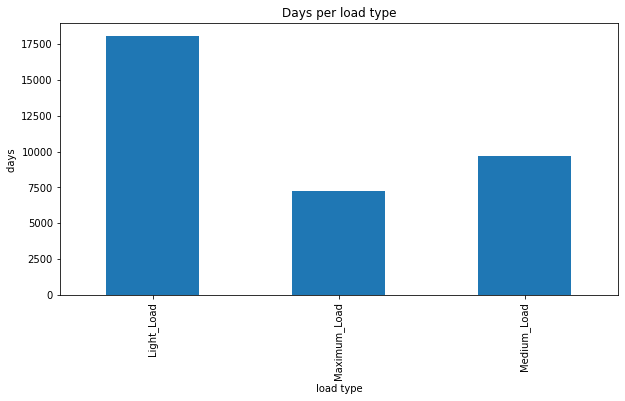

In [15]:
numberofdaysperloadtype.plot(kind="bar", x="load_type",y="numberofdaysperloadtype",xlabel="load type", ylabel="days ", title="Days per load type",figsize=(10,5))
     

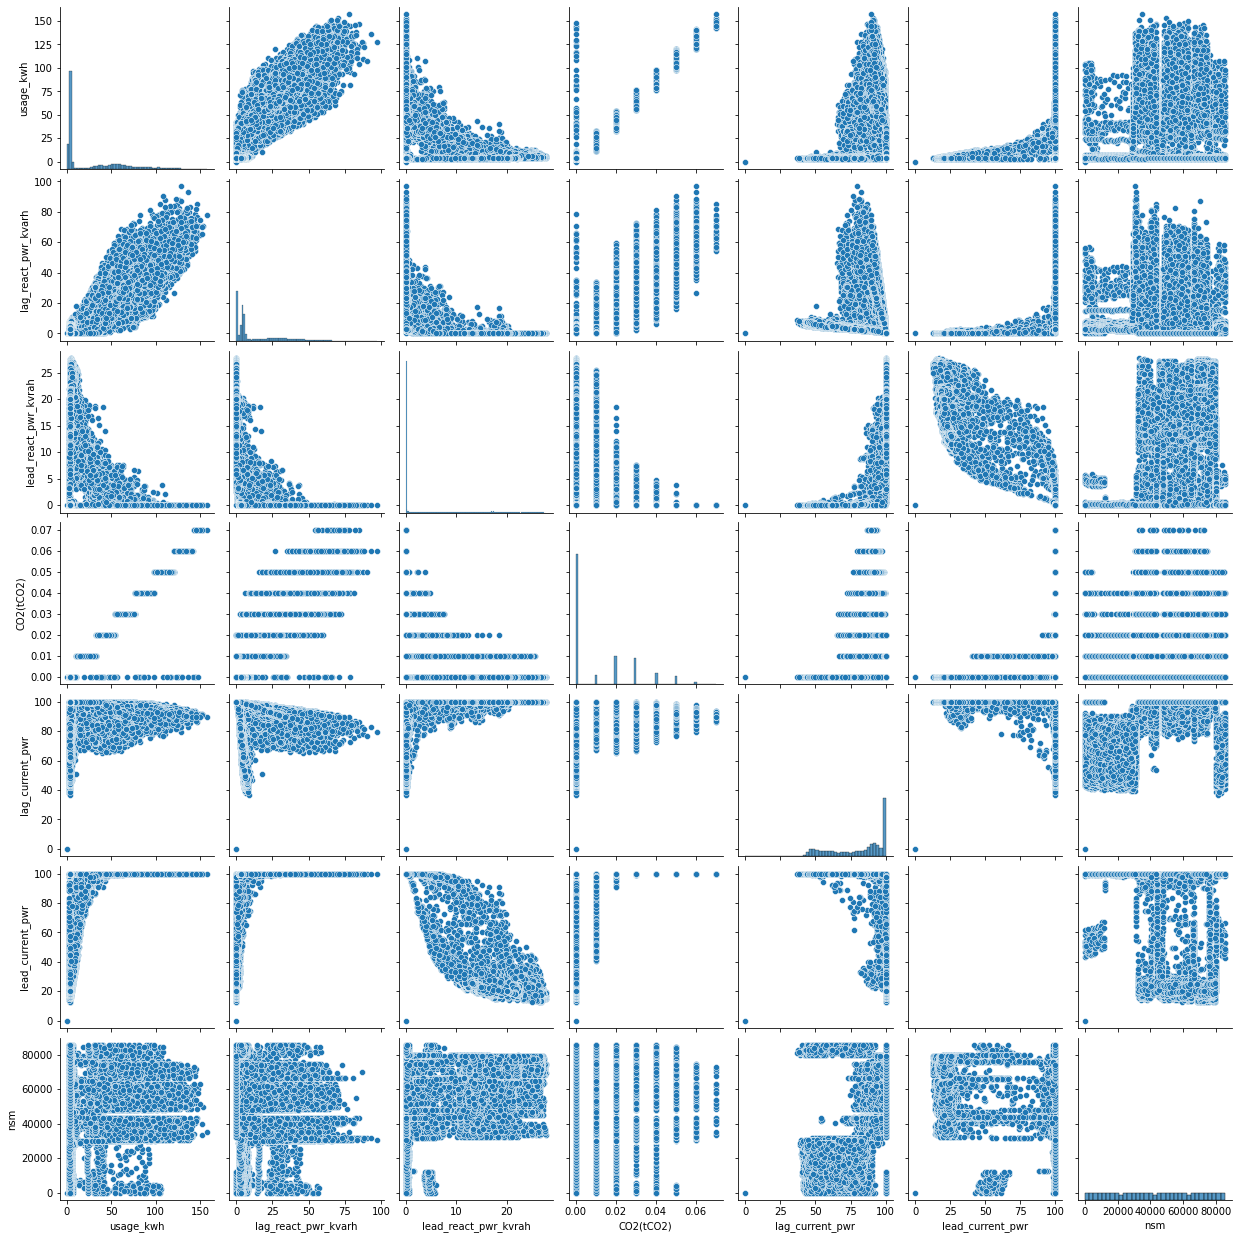

In [16]:

sns.pairplot(df)

Visualization takeaways: It looks as though there are some variables that the data might be capped for some reason. For instance, if you look at lag_current_pwr, lead_current_pwr,lead_react_pwr these variables are max value only goes up to 100, thus the data is skewed more to more to the upper bounds. There could be a linear relationship between lag_react_pwr_kvarh /usage_kwh, lead_current_power/lead_react_pwr_krvah.

**Splitting Data into Train/Test**

In [17]:
X=df[['lag_react_pwr_kvarh','lead_react_pwr_kvrah','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm','week_status','day_of_week','load_type']] #putting variables into X data frame
y=df['usage_kwh']# putting usage_kwh into y data frame- this is variable we are trying to predict



     

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2,random_state=0)#splitting up data into 4 dataframes. test data frames will have 20% of data to check validity of training sets
     


**Building the Pipeline**

In [23]:
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm']
cat_attribs = ['week_status','day_of_week','load_type']

In [24]:
col_transform = ColumnTransformer(transformers=[
                                  ('cat', OneHotEncoder(), cat_attribs),
                                  ('num', MinMaxScaler(), num_attribs)],
                                  remainder='passthrough'
                                   )

In [25]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('mlr_model', LinearRegression()),
                      ])

**Executing the Model**

In [ ]:
pipeline.fit(X_train,y_train)

**Evaluating the Model**

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_train_pred = pipeline.predict(X_train)

In [ ]:
print("Train RMSE: ", mean_squared_error(y_train, y_train_pred)**(0.5))
print("Test RMSE: ", mean_squared_error(y_test, y_pred)**(0.5))
     

In [ ]:

print("R-Squared Score: ", r2_score(y_pred, y_test))

In [ ]:
pipeline.named_steps['mlr_model'].intercept_

In [ ]:
pipeline.named_steps['mlr_model'].coef_

**Conclusion**

The prediction variables multiple linear regression model account for 97% of the variation of test variables, therefore the model is a good gauge of predicting kwh usage

**Problem 2**

**Reading the Data**

In [35]:
df['week_status']=df['week_status'].apply(lambda x: 1 if x=="Weekday" else 0)# if value in the row is yes, recode to 1, otherwise recode to 0
     


In [36]:
df

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvrah,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,1,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,Monday,Light_Load


**Splitting Data into Train/Test**

In [39]:
X= df[['lag_react_pwr_kvarh','lead_react_pwr_kvrah','CO2(tCO2)','lag_current_pwr','lead_current_pwr', 'usage_kwh','nsm','load_type']]

     


In [38]:
y=df[['week_status']]

In [37]:
df.week_status.groupby(df.week_status).count()

week_status
0     9984
1    25056
Name: week_status, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=.20, random_state=0)

**Building the Pipeline**

In [40]:
num_attribs=['lag_react_pwr_kvarh','lead_react_pwr_kvrah','CO2(tCO2)','lag_current_pwr','lead_current_pwr','usage_kwh','nsm']
cat_attribs=['load_type']

In [41]:
col_transform=ColumnTransformer(transformers=[('cat',OneHotEncoder(),cat_attribs),('num',MinMaxScaler(),num_attribs)]) #transforming categorical attributes to one hot encoder attributes, and numerical with minmax scaler
     

In [43]:
pipeline = Pipeline([('trans', col_transform), ('mlr', LogisticRegression(max_iter=1000)),])

**Executing the Model**

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

**Evaluating the Model**

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

In [ ]:
y_pred_proba = pipeline.predict_proba(X_test)[:,1]

In [ ]:

lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_proba)

In [ ]:
plt.plot(lr_recall, lr_precision, label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [ ]:
df.week_status.groupby(df.week_status).count()

In [ ]:
auc(lr_recall, lr_precision)

**Interpretation and explanation of Precision-Recall Curve**

 when our recall is low our precision is very high and then it continues on a pretty consistent downward trend until it approaches the 90% of recall which is consistent with the auc score of .89. 

**Conclusion**

Logistic regression model is very suitable for predicting whether the data 
occured on a weekday or a weekend.

 With a F1 score of 86% that means that this model is very good and almost great at doing so. 